# <font color='red'> [0] Build the model </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [1]:
from main import *

## <font color='green'> [0.2] Creation of an empty model </font> 

In [2]:
momo = model()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [0.3] Add of reaction and metabolite </font> 

In [3]:
momo.metabolites.add(name = "H2O", external = True, concentration = 1.0)

metabolite_reaction = {"H2O" : 1.0,
                       "H2"  :-1.0,
                       "O2"  :-0.5}
momo.reactions.add(name = "combustion", metabolites = metabolite_reaction, k_eq = 1.0, law = "", flux=1.0)

Don't worry, the metabolite will be add after the add of the 1st reaction
The metabolite "H2O" is already in the model !


In [4]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1.0


#### Add a reaction with specified metabolite and stoichiometric coefficient automaticaly adds them to the model

In [5]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0
O2,False,1.0


#### Print the stoichiometric matrix

In [6]:
momo.Stoichio_matrix

,combustion
H2O,1.0
H2,-1.0
O2,-0.5


#### It is also possible to remove a metabolite or a reaction to the model

In [7]:
momo.metabolites.remove("O2")
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0


#### Removing a metabolite remove also every mention of it in the reactions dataframe and in the stoichiometric matrix

In [8]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0}",1.0,,1.0


In [9]:
momo.Stoichio_matrix

,combustion
H2O,1.0
H2,-1.0


In [10]:
momo.reactions.remove(name="combustion")
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)


## <font color='green'> [0.4] Stoichiometric matrix from an existant one </font> 

In [11]:
reactions = {'Combustion': [1. , -1., -0.5],
            'Reaction_2': [0. ,  0.,   0. ]}

metabolites = ['H2O', 'H2', 'O2']

dataframe = pd.DataFrame(reactions, index=metabolites)

momo.Stoichio_matrix = dataframe

#### And the metabolites and reactions dataframes are automatically update

In [12]:
momo.Stoichio_matrix

,Combustion,Reaction_2
H2O,1.0,0.0
H2,-1.0,0.0
O2,-0.5,0.0


In [13]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
Combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1
Reaction_2,{},1.0,,1


In [14]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,False,1
H2,False,1
O2,False,1


## <font color='green'> [0.5] Create a linear system </font> 

In [15]:
momo.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


### Display the variables of the system

In [16]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
meta_0,True,1
meta_1,False,1
meta_2,False,1
meta_3,True,1


In [17]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


## <font color='green'> [0.6] Read a CSV file </font> 

In [18]:
momo.read_CSV()

In [19]:
momo.Stoichio_matrix

,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
13dpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2pg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3pg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6pgc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6pgl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s7p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,1,0,0
succ,0,0,0,0,0,0,0,0,0,0,...,0,1,-1,-1,-1,0,0,0,0,0
succ(e),0,0,0,0,0,0,0,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
succoa,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## <font color='green'> [0.7] Read a SBML file </font> 

In [20]:
momo.read_SBML()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file


In [21]:
momo.Stoichio_matrix

,PTS_RPTSsy,PGI_R02740,PFK_R04779,ALD_R01070,TIM_R01015,GAP_R01061,PGK_R01512,PGM_R01518,PGH_R00658,PYK_R00200,...,ACN_R01900,ICD_R00709,KGD_R08549,SCS_R00405,SDH_R02164,FUM_R01082,MDH_R00342,PPC_R00345,Overflow,OxAConsumption
D_Glucose,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phosphoenolpyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D_Glucose_6_phosphate,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_S_Malate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Acetyl_CoA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Fumarate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
cis_Aconitate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_6_Phospho_D_gluconate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orthophosphate,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# <font color='red'> [1] Play with the variables </font> 

In [22]:
momo.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [1.1] Display the data </font> 

### <font color='white'> [1.1.1] Display the stoichiometric matrix </font> 

In [23]:
momo.Stoichio_matrix

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


### <font color='white'> [1.1.2] Display the metabolite dataframe </font> 

In [24]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
meta_0,True,1
meta_1,False,1
meta_2,False,1
meta_3,True,1


### <font color='white'> [1.1.3] Display the reactions dataframe </font> 

In [25]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


### <font color='white'> [1.1.4] Display the enzymes dataframe </font> 

In [26]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


### <font color='white'> [1.1.5] Display the elasticities matrices </font> 

In [27]:
momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0,0,0,0
reaction_1,0,0,0,0
reaction_2,0,0,0,0


In [28]:
momo.elasticity.p

,Temperature
reaction_0,0
reaction_1,0
reaction_2,0


### <font color='white'> [1.1.6] Display the enzymes dataframes </font> 

In [29]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


## <font color='green'> [1.2] Enzymes </font> 

#### The enzyme dataframe is initially empty

### <font color='white'> [1.2.1] Add enzymes linked to each reactions </font> 

In [30]:
momo.enzymes.add_to_all_reaction()

In [31]:
momo.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


### <font color='white'> [1.2.1] Add a specific enzyme </font> 

In [32]:
momo.enzymes.add(name = "name_enzyme", mean = 1.0, reaction_linked = ["PTS_RPTSsy", "PGI_R02740", "PFK_R04779"])

### <font color='white'> [1.2.1] Remove a specific enzyme </font> 

In [33]:
momo.enzymes.remove(name = "name_enzyme")

But on this state, the enzymes hasn't any influence on our study, we have to consider our enzyme as a parameters to create a elasticity between it and flux

## <font color='green'> [1.3] Parameters </font> 

### Adding a new parameters automatcally update the E_p elasticiy matix by adding a new column

There is only the temperture by default in the parameters dataframe

In [34]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0


### <font color='white'> [1.3.1] Add a specific parameter one by one </font> 

In [35]:
momo.parameters.add(name = "name_parameter", mean = 1.0, Standard_deviation = 0.5)

### <font color='white'> [1.3.2] Removing a specific parameter </font> 

In [36]:
momo.parameters.remove(name = "name_parameter")

### <font color='white'> [1.3.3] Add every externals metabolite as parameters </font> 

In [37]:
momo.parameters.add_externals()

In [38]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0


##### And the enzymes too

### <font color='white'> [1.3.4] Add every enzymes as parameters </font> 

In [39]:
momo.parameters.add_enzymes()

In [40]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


## <font color='green'> [1.4] Elasticities </font> 

#### When the .add_externals() and .add_enzymes() are call, it automatically add default values considering the link in the dataframe

In [41]:
momo.elasticity.p

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0,0.5,0.0,1.0,0.0,0.0
reaction_1,0,0.0,0.0,0.0,1.0,0.0
reaction_2,0,0.0,-0.5,0.0,0.0,1.0


In [42]:
momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0,0,0,0
reaction_1,0,0,0,0
reaction_2,0,0,0,0


#### We can add default value to the E_s matrix too

In [43]:
momo.elasticity.half_satured()

momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0.5,-0.5,-0.0,-0.0
reaction_1,-0.0,0.5,-0.5,-0.0
reaction_2,-0.0,-0.0,0.5,-0.5


In [44]:
momo.Jacobian

,meta_0,meta_1,meta_2,meta_3
meta_0,-0.5,0.5,0.0,0.0
meta_1,0.5,-1.0,0.5,0.0
meta_2,0.0,0.5,-1.0,0.5
meta_3,0.0,0.0,0.5,-0.5


In [45]:
momo.rho()

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0,meta_1,meta_2,meta_3,reaction_0,reaction_1,reaction_2
Temperature,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_0_para,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,-0.369274,0.196116,0.196116,0.123091,0.307389,0.406994,0.156174
meta_3_para,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.123091,0.196116,0.196116,-0.369274,-0.051232,-0.090443,0.416463
enzyme_reaction_0_para,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,-0.738549,0.392232,0.392232,0.246183,0.614779,0.813988,0.312348
enzyme_reaction_1_para,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,-0.492366,-0.784465,0.784465,0.492366,0.717242,0.361773,0.104116
enzyme_reaction_2_para,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,-0.246183,-0.392232,-0.392232,0.738549,0.102463,0.180886,-0.832927
meta_0,0.0,-0.369274,0.123091,-0.738549,-0.492366,-0.246183,1.000000,0.144841,-0.627646,-0.696970,-0.952231,-0.985251,-0.083303
meta_1,0.0,0.196116,0.196116,0.392232,-0.784465,-0.392232,0.144841,1.000000,-0.230769,-0.627646,-0.311467,0.026606,0.479842
meta_2,0.0,0.196116,0.196116,0.392232,0.784465,-0.392232,-0.627646,-0.230769,1.000000,0.144841,0.813834,0.594201,0.643192
meta_3,0.0,0.123091,-0.369274,0.246183,0.492366,0.738549,-0.696970,-0.627646,0.144841,1.000000,0.636923,0.595604,-0.621565


### We can also read a SBML file

In [46]:
momo.read_SBML()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file


In [47]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


In [48]:
momo.enzymes.add_to_all_reaction()
momo.parameters.add_externals()
momo.parameters.add_enzymes()

In [49]:
print(f"Shape of the stoichio matrix : {momo.Stoichio_matrix.shape} \n")
print(f"numbers of metabolite in the model : {momo.metabolites.len} \n")
print(f"Numbers of reaction in the model : {momo.reactions.len} \n")
print(f"Numbers of enzyme in the model : {momo.enzymes.df.shape[0]} \n")
print(f"Numbers of parameters in the model : {momo.parameters.df.shape[0]} \n")

Shape of the stoichio matrix : (40, 31) 

numbers of metabolite in the model : 40 

Numbers of reaction in the model : 31 

Numbers of enzyme in the model : 31 

Numbers of parameters in the model : 32 



In [50]:
momo.elasticity.half_satured()

In [51]:
momo.elasticity.s

,D_Glucose,Phosphoenolpyruvate,Pyruvate,D_Glucose_6_phosphate,_S_Malate,Acetyl_CoA,Fumarate,cis_Aconitate,_6_Phospho_D_gluconate,Orthophosphate,...,D_Fructose_1_6_bisphosphate,D_Glyceraldehyde_3_phosphate,Citrate,Succinyl_CoA,_3_Phospho_D_glycerate,D_Glucono_1_5_lactone_6_phosphate,D_Fructose_6_phosphate,_2_Phospho_D_glycerate,Succinate,Sedoheptulose_7_phosphate
PTS_RPTSsy,-0.5,-0.5,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PGI_R02740,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0
PFK_R04779,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0
ALD_R01070,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
TIM_R01015,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
GAP_R01061,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,...,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PGK_R01512,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0
PGM_R01518,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.5,-0.0,-0.0
PGH_R00658,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0
PYK_R00200,-0.0,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


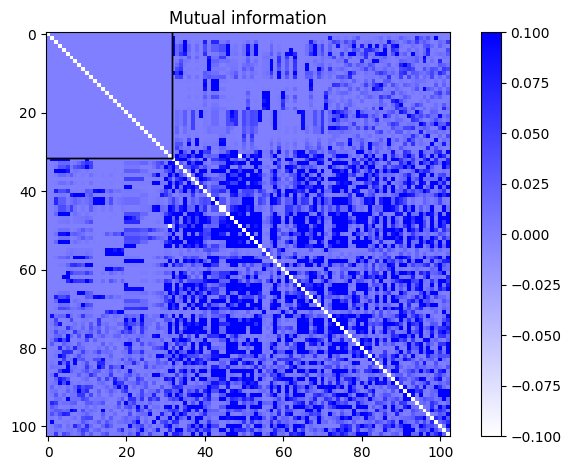

In [52]:
momo.plot(result="MI", label=False, value_in_cell=False )

In [53]:
momo.MI(groups= )

SyntaxError: invalid syntax (3546447238.py, line 1)

In [ ]:
momo.data_sampling

,Name,Type,Standard deviation,Distribution


In [ ]:
momo.data_sampling.loc[1] = [["PTS_RPTSsy","enzyme_PTS_RPTSsy_para"], "elasticity_p", 1, "uniform"]

In [ ]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
PTS_RPTSsy,"{'D_Glucose': 1.0, 'Phosphoenolpyruvate': 1.0,...",5.726218e+07,,0.455892
PGI_R02740,"{'D_Glucose_6_phosphate': 1.0, 'D_Fructose_6_p...",3.911890e-01,,0.323686
PFK_R04779,"{'ATP': 1.0, 'ADP': 1.0, 'D_Fructose_1_6_bisph...",1.764869e+03,,0.411823
ALD_R01070,"{'Glycerone_phosphate': 1.0, 'D_Fructose_1_6_b...",1.889019e-01,,0.411823
TIM_R01015,"{'Glycerone_phosphate': 1.0, 'D_Glyceraldehyde...",2.007470e-01,,0.411823
GAP_R01061,"{'Orthophosphate': 1.0, 'NADH': 1.0, 'NADplus'...",7.563514e-04,,0.867715
PGK_R01512,"{'ATP': 1.0, 'ADP': 1.0, '_3_Phospho_D_glycero...",1.883714e+03,,0.867715
PGM_R01518,"{'_3_Phospho_D_glycerate': 1.0, '_2_Phospho_D_...",2.227972e-01,,0.867715
PGH_R00658,"{'Phosphoenolpyruvate': 1.0, '_2_Phospho_D_gly...",5.202263e+00,,0.867715
PYK_R00200,"{'Phosphoenolpyruvate': 1.0, 'Pyruvate': 1.0, ...",2.233581e+04,,0.136239


In [ ]:
momo.sampling(100, result="MI", seed_constant=False)

running tiem of the code : 3.930666446685791 
So 0.03930666446685791 per occurences !


array([[       inf, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        ,        inf, 0.        , ..., 0.01270208, 0.00182706,
        0.00086002],
       [0.        , 0.        ,        inf, ..., 0.01638997, 0.01032765,
        0.05623992],
       ...,
       [0.        , 0.01270208, 0.01638997, ...,        inf, 0.00078047,
        0.10868577],
       [0.        , 0.00182706, 0.01032765, ..., 0.00078047,        inf,
        0.02260352],
       [0.        , 0.00086002, 0.05623992, ..., 0.10868577, 0.02260352,
               inf]])

In [ ]:
momo.Stoichio_matrix

,PTS_RPTSsy,PGI_R02740,PFK_R04779,ALD_R01070,TIM_R01015,GAP_R01061,PGK_R01512,PGM_R01518,PGH_R00658,PYK_R00200,...,KGD_R08549,SCS_R00405,SDH_R02164,FUM_R01082,MDH_R00342,PPC_R00345,Overflow,OxAConsumption,creation_reg_test,destruction_reg_test
D_Glucose,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Phosphoenolpyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
Pyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
D_Glucose_6_phosphate,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
_S_Malate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
Acetyl_CoA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
Fumarate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0
cis_Aconitate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
_6_Phospho_D_gluconate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Orthophosphate,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


In [ ]:
momo.MI([["enzyme_PTS_RPTSsy_para","enzyme_PGI_R02740_para"],["FUM_R01082","MDH_R00342"],["PPC_R00345"]])

,0,1,2
0,inf,NaN,0.292481
1,-inf,NaN,NaN
2,0.292481,NaN,inf


In [55]:
momo.data_sampling

,Name,Type,Standard deviation,Distribution


In [ ]:
momo.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation


In [ ]:
momo.regulations.add("reg_test", "PTS_RPTSsy", "D_Glucose", allosteric=False)

In [ ]:
momo.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation
reg_test,PTS_RPTSsy,D_Glucose,1,transcriptional


In [ ]:
print(momo.metabolites.df.shape[0])
print(momo.reactions.df.shape[0])

momo.Stoichio_matrix.shape


41
33


(41, 33)

In [ ]:
momo.Stoichio_matrix

,PTS_RPTSsy,PGI_R02740,PFK_R04779,ALD_R01070,TIM_R01015,GAP_R01061,PGK_R01512,PGM_R01518,PGH_R00658,PYK_R00200,...,KGD_R08549,SCS_R00405,SDH_R02164,FUM_R01082,MDH_R00342,PPC_R00345,Overflow,OxAConsumption,creation_reg_test,destruction_reg_test
D_Glucose,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Phosphoenolpyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
Pyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
D_Glucose_6_phosphate,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
_S_Malate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
Acetyl_CoA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
Fumarate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0
cis_Aconitate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
_6_Phospho_D_gluconate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Orthophosphate,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


In [ ]:
momo.regulations()

TypeError: 'Regulation_class' object is not callable

In [ ]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
enzyme_PTS_RPTSsy_para,1.0,1.0
enzyme_PGI_R02740_para,1.0,1.0
enzyme_PFK_R04779_para,1.0,1.0
enzyme_ALD_R01070_para,1.0,1.0
enzyme_TIM_R01015_para,1.0,1.0
enzyme_GAP_R01061_para,1.0,1.0
enzyme_PGK_R01512_para,1.0,1.0
enzyme_PGM_R01518_para,1.0,1.0
enzyme_PGH_R00658_para,1.0,1.0
